In [3]:
#Linear Regression
import numpy as np
import csv
import sys
from sklearn import linear_model

## read csv file
f = open("BeijingPM20100101_20151231.csv", "r")
reader = csv.reader(f)

## multiple features are set
pm = []
dp = []
humid = []
pres = []
temp = []
wind = []
precipitation = []

rownum = 0
for row in reader:
	if rownum != 0:
		pm.append((float)(row[0]))
		dp.append((float)(row[1]))
		humid.append((float)(row[2]))
		pres.append((float)(row[3]))
		temp.append((float)(row[4]))
		wind.append((float)(row[5]))
		precipitation.append((float)(row[6]))
	rownum += 1

data_len = len(pm)
num_train = (int)(data_len * 0.8)
num_test = data_len - num_train

## split dataset into two parts, train and test, validation set is automatically seperated in the scikit function when cross validation is used
X_pm_train = np.array(pm[:num_train]).reshape(num_train, 1)
X_dp_train = np.array(dp[:num_train]).reshape(num_train, 1)
X_humid_train = np.array(humid[:num_train]).reshape(num_train, 1)
X_pres_train = np.array(pres[:num_train]).reshape(num_train, 1)
X_temp_train = np.array(temp[:num_train]).reshape(num_train, 1)
X_wind_train = np.array(wind[:num_train]).reshape(num_train, 1)
Y_train = np.array(precipitation[:num_train]).reshape(num_train, 1)

def data_mean(values):
	return np.sum(values, axis = 0)/float(values.shape[0])

def data_range(values):
	return np.amax(values, axis = 0) - np.amin(values, axis = 0)

X_train = np.concatenate((X_pm_train, X_dp_train, X_humid_train, X_humid_train ** 2, X_humid_train ** 3, X_pres_train, X_pres_train ** 2, X_temp_train, X_wind_train ** 2), axis = 1)

X_train_mean = data_mean(X_train)
X_train_range = data_range(X_train)
Y_train_mean = data_mean(Y_train)
Y_train_range = data_range(Y_train)

X_train = (X_train - X_train_mean) / X_train_range
Y_train = (Y_train - Y_train_mean) / Y_train_range

X_pm_test = np.array(pm[num_train:]).reshape(num_test, 1)
X_dp_test = np.array(dp[num_train:]).reshape(num_test, 1)
X_humid_test = np.array(humid[num_train:]).reshape(num_test, 1)
X_pres_test = np.array(pres[num_train:]).reshape(num_test, 1)
X_temp_test = np.array(temp[num_train:]).reshape(num_test, 1)
X_wind_test = np.array(wind[num_train:]).reshape(num_test, 1)
Y_test = np.array(precipitation[num_train:]).reshape(num_test, 1)

X_test = np.concatenate((X_pm_test, X_dp_test, X_humid_test, X_humid_test ** 2, X_humid_test ** 3, X_pres_test, X_pres_test ** 2, X_temp_test, X_wind_test ** 2), axis = 1)

X_test = (X_test - X_train_mean) / X_train_range
Y_test = (Y_test) - Y_train_mean / Y_train_range

## use cross validation to find the optimal alpha (regularization strenth parameter)
reg = linear_model.RidgeCV(alphas = [10.0, 50.0, 100.0], fit_intercept = True, normalize = False)
reg.fit(X_train, Y_train)

Y_pred = X_train.dot(reg.coef_.T) + reg.intercept_
rmse = np.sum(np.square(Y_pred - Y_train))/(float)(Y_pred.shape[0])
print('train rmse: %f' % rmse)
print('alpha = %f, intercept = %f, weight = ' % (reg.alpha_, reg.intercept_))
print(reg.coef_)
Y_pred = X_test.dot(reg.coef_.T) + reg.intercept_
rmse = np.sum(np.square(Y_pred - Y_test))/(float)(Y_pred.shape[0])
print('test rmse: %f' % rmse)


train rmse: 0.000181
alpha = 10.000000, intercept = -0.000000, weight = 
[[-0.01077004  0.01028208 -0.00874588 -0.0069477   0.01820754 -0.00262986
  -0.00126721 -0.00926322 -0.00020599]]
test rmse: 0.265035


In [4]:
#Artificial Neural Networks
import csv
import numpy as np
from sklearn.neural_network import MLPClassifier
f = open('train.csv', 'r')
reader=csv.reader(f)

Y = np.empty([42000])
X = np.empty([42000, 784])

rowNum = 0
for row in reader:
    if rowNum == 0: # skip header
        rowNum += 1
    else:
        Y[rowNum - 1] = row[0] # read label
        for col in range(1, 785):
            X[rowNum - 1, col - 1] = row[col] # read image, for each image, pixels are put into a row
        rowNum += 1
        Y_train = Y[0: 33600]
Y_test = Y[33600: 42000]
X_train = X[0: 33600, :]
X_test = X[33600: 42000, :]
print(Y_train.shape)
print(X_train.shape)
print(Y_test.shape)
print(X_test.shape)
classifier = MLPClassifier(solver = 'sgd',hidden_layer_sizes=(784, ), random_state = 1, learning_rate = 'constant', verbose = True)
classifier.fit(X_train, Y_train)
Y_predict = classifier.predict(X_test)
accuracy = float(np.count_nonzero(Y_predict == Y_test))/float(Y_test.shape[0])
print(accuracy)

(33600,)
(33600, 784)
(8400,)
(8400, 784)
Iteration 1, loss = 1.40934312
Iteration 2, loss = 0.31285049
Iteration 3, loss = 0.23010237
Iteration 4, loss = 0.18947359
Iteration 5, loss = 0.16445879
Iteration 6, loss = 0.14220434
Iteration 7, loss = 0.12627482
Iteration 8, loss = 0.11709359
Iteration 9, loss = 0.10267391
Iteration 10, loss = 0.09373810
Iteration 11, loss = 0.08281682
Iteration 12, loss = 0.07616403
Iteration 13, loss = 0.07006323
Iteration 14, loss = 0.06122891
Iteration 15, loss = 0.05854555
Iteration 16, loss = 0.05346584
Iteration 17, loss = 0.04679163
Iteration 18, loss = 0.04313984
Iteration 19, loss = 0.04064832
Iteration 20, loss = 0.03652288
Iteration 21, loss = 0.03419382
Iteration 22, loss = 0.03117506
Iteration 23, loss = 0.02889861
Iteration 24, loss = 0.02504551
Iteration 25, loss = 0.02118085
Iteration 26, loss = 0.01981429
Iteration 27, loss = 0.01946265
Iteration 28, loss = 0.01738894
Iteration 29, loss = 0.01587885
Iteration 30, loss = 0.01461441
Iterati

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]
[[ 6.2  2.9  4.3  1.3]
 [ 5.8  2.8  5.1  2.4]
 [ 6.7  3.3  5.7  2.5]
 [ 4.9  2.4  3.3  1. ]
 [ 5.4  3.4  1.7  0.2]]
['Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']
1.0
1.0
{'C': 1.0} train score =  0.975
test score =  1.0
{'C': 1.0, 'gamma': 0.3} train score =  0.975
test score =  1.0
{'C': 1.0, 'gamma': 0.3} train score =  0.966666666667
test score =  1.0
[[ 2.37946173  5.89634545]
 [ 9.16628119  0.29888982]
 [ 4.05380229  3.48675769]
 [ 6.98593531  6.29032446]
 [ 6.31885923  8.02665527]
 [ 5.02249019  2.92037684]
 [ 4.38549363  0.56018902]
 [ 4.25046212  1.24913001]
 [ 2.03190066  5.43767087]
 [ 8.30462903  7.73643798]]
[ 0.  1.  0.  0.  1.  0.  1.  1.  1.  1.]
[[ 2.37946173  5.89634545]
 [ 9.16628119  0.29888982]
 [ 4.05380229  3.48675769]
 [ 6.98593531  6.290

Text(0.5,1,'Predicted Data Distribution')

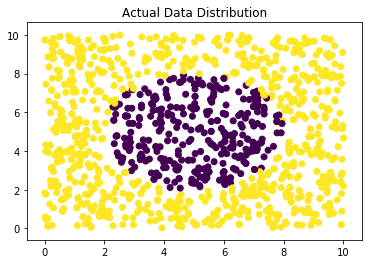

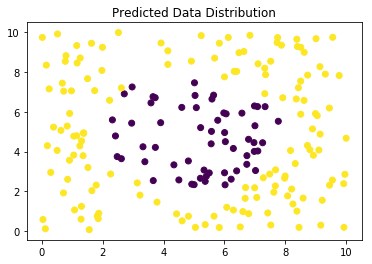

In [5]:
#Support Vector Machine
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
%matplotlib inline
import matplotlib.pyplot as plt
#read csv
df = pd.read_csv("Iris.csv")

Y = np.array(df['Species'])
X = np.array(df.drop(['Id', 'Species'], axis = 1))

print(Y[0:5])
print(X[0:5])
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, stratify = Y)
print(X_train[0:5])
print(Y_train[0:5])
model = LinearSVC()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.score(X_test, Y_test))
model = SVC(C = 1.0, gamma = 0.5)
model.fit(X_train, Y_train)
print(model.score(X_test, Y_test))
#linear svm
param_grid = {'C': [1e-10, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_, 'train score = ', model.best_score_)
print('test score = ', model.best_estimator_.score(X_test, Y_test))
#polynomial svm
param_grid = {'C': [1e-10, 1.0, 2.0, 3.0], 'gamma': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'poly'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_, 'train score = ', model.best_score_)
print('test score = ', model.best_estimator_.score(X_test, Y_test))
#gaussian svm
param_grid = {'C': [1e-10, 1e-1, 1.0, 1.5, 2.0, 3.0], 'gamma': [1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0]}
model = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_, 'train score = ', model.best_score_)
print('test score = ', model.best_estimator_.score(X_test, Y_test))
# Manually create dataset
numDot = 1000

x1 = 10.0 * np.random.rand(numDot)
x2 = 10.0 * np.random.rand(numDot)
y = (np.square(x1 - 5) + np.square(x2 - 5) - 9)
y[y >= 0] = 1
y[y < 0] = 0
plt.scatter(x1, x2, c= y)
X = np.concatenate((x1.reshape([numDot,1]), x2.reshape([numDot, 1])), axis = 1)
Y = y
print(X[0:10])
print(Y[0:10])
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
print(X[0:10])
print(Y[0:10])
#grid search
param_grid = {'C': [1.0, 10.0, 100.0], 'gamma': [1.0]}
model = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv = 5)
model.fit(X_train, Y_train)
print(model.best_params_, 'train score = ', model.best_score_)
print('test score = ', model.best_estimator_.score(X_test, Y_test))
#plot actual data distribution and predict data distribution
Y_pred = model.best_estimator_.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_test)
plt.title('Actual Data Distribution')
plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c = Y_pred)
plt.title('Predicted Data Distribution')

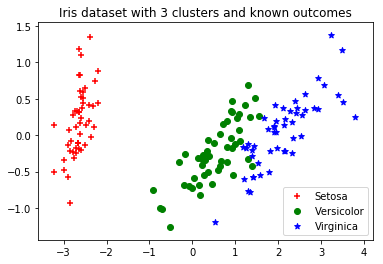

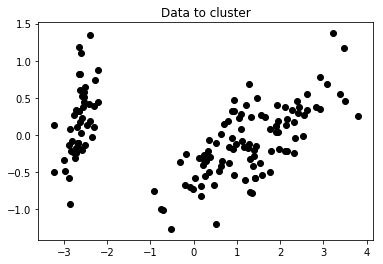

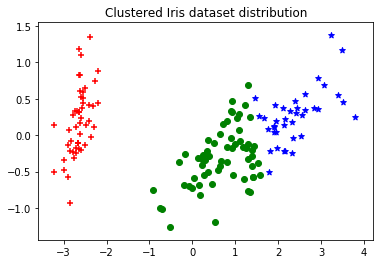

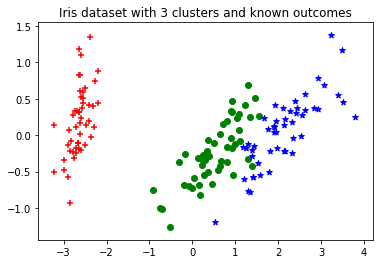

Initialization 0
  Iteration 0
  Iteration 10
Initialization converged: True


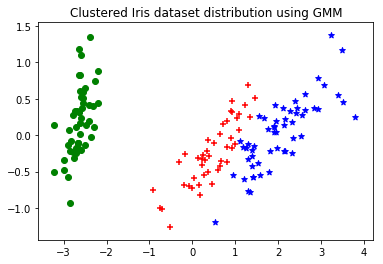

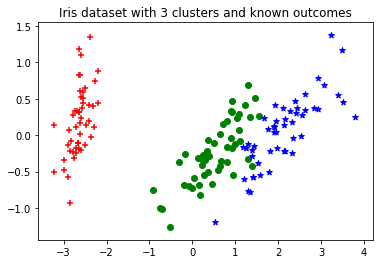

In [6]:
#K-means clustering
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
from scipy.stats import norm
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
# load dataset
iris = load_iris()
# use PCA to convert 4 features into 2 features for visualization
pca = PCA(n_components = 2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# visualize dataset
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.legend([c1, c2, c3], ['Setosa', 'Versicolor', 'Virginica'])
plt.title('Iris dataset with 3 clusters and known outcomes')

plt.figure()
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = 'black')
plt.title('Data to cluster')
plt.show()
# K-means clustering
X = np.array(iris.data)
k_means = KMeans(n_clusters=3)
k_means.fit(X)
labels = k_means.labels_
# visualize clustered dataset
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Clustered Iris dataset distribution')

plt.figure()
# visualize original dataset
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Iris dataset with 3 clusters and known outcomes')
plt.show()
# GMM
gmm = GaussianMixture(n_components = 3, covariance_type='full', init_params='kmeans', verbose = 1)
gmm.fit(X)
labels = gmm.predict(X)
# visualize clustered dataset
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Clustered Iris dataset distribution using GMM')

plt.figure()
# visualize original dataset
for i in range(0, pca_2d.shape[0]):
    if iris.target[i] == 0:
        c1 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'r', marker = '+')
    elif iris.target[i] == 1:
        c2 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'g', marker = 'o')
    elif iris.target[i] == 2:
        c3 = plt.scatter(pca_2d[i,0], pca_2d[i,1], c = 'b', marker = '*')
plt.title('Iris dataset with 3 clusters and known outcomes')
plt.show()

# Note: color doesn't matter, it just means a cluster, so even the color of clusters are different, but the results are good
